**Need to install Nessosry Libraries
1.pandas
2.numpy
3.matplotlib
4.seaborn
5.scikit-learn
6.tensorflow
7.keras**

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras

**Importing the installed libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler

**Importing the fraud dataset**

In [3]:
df=pd.read_csv("/content/creditcard.csv")#Given the path of the dataset

**Checking the dataset description**

In [4]:
print(df.head())  # View first 5 rows
print(df.info())  # Check for missing values and data types
print(df['Class'].value_counts())  # Check class distribution

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

**Doing data preprocessing
Normalizing Amount and Time coiunmn**

In [5]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

**Seprating features and target**

In [6]:
X = df.drop('Class', axis=1)
y = df['Class']

**Spliting the data into training and testing sets**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Anomaly Detection with Isolation Forest
Training the Isolation Forest model**

In [8]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(X_train)

IsolationForest(contamination=0.01, random_state=42)

**Predicting anomalie**

In [9]:
y_pred = iso_forest.predict(X_test)
y_pred = np.where(y_pred == -1, 1, 0)  # Convert -1 (anomaly) to 1 (fraud), 1 to 0 (legitimate)

**Evaluating the model**

In [10]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

[[56311   553]
 [   33    65]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.66      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.83      0.59     56962
weighted avg       1.00      0.99      0.99     56962

ROC-AUC Score: 0.826770174164207


**Anomaly Detection with Autoencoders
Building the autoencoder model**

In [11]:
input_dim = X_train.shape[1]
encoding_dim = 14  # Half of input dimensions

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

**Training the autoencoder**

In [12]:
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=32, validation_data=(X_test, X_test), verbose=1)

Epoch 1/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.9339 - val_loss: 0.8167
Epoch 2/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.8171 - val_loss: 0.8063
Epoch 3/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.8046 - val_loss: 0.8031
Epoch 4/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.8082 - val_loss: 0.8009
Epoch 5/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.7961 - val_loss: 0.7991
Epoch 6/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.7774 - val_loss: 0.7977
Epoch 7/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.7932 - val_loss: 0.7971
Epoch 8/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.7887 - val_loss: 0.7969
Epoch 9/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.7997 - val_loss: 0.7965
Epoch 10/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.7785 - val_loss: 0.7964
Epoch 11/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.7904 - val_loss: 0.7961
Epoch 12/20
7121/71

**Calculating reconstruction error**

In [13]:
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


**Classifing anomalies**

In [14]:
threshold = np.quantile(mse, 0.99)  # Set threshold at 99th percentile
y_pred = (mse > threshold).astype(int)

**Evaluating the model**

In [15]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

[[56354   510]
 [   38    60]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.11      0.61      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.80      0.59     56962
weighted avg       1.00      0.99      0.99     56962

ROC-AUC Score: 0.8016380651866825


**Visualize Results**

**Ploting reconstruction of error distribution**

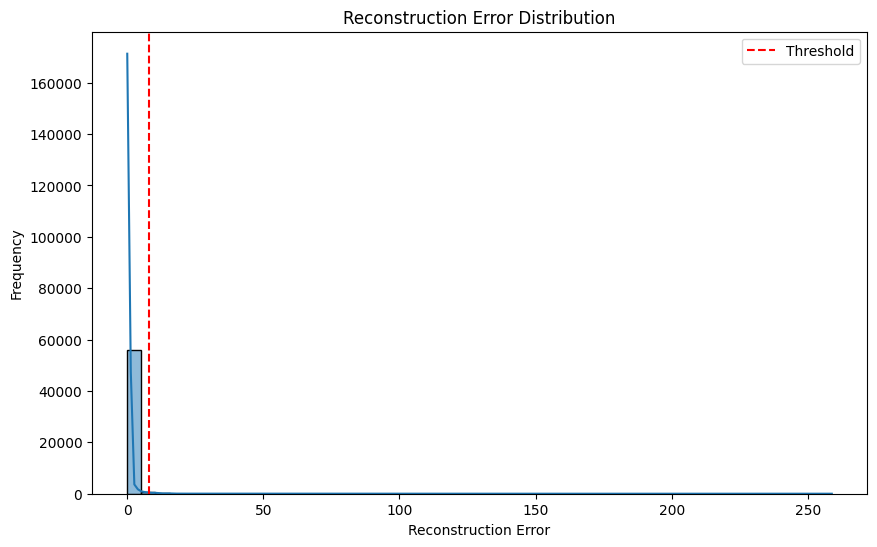

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(mse, bins=50, kde=True)
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Ploting the confusion matrix**

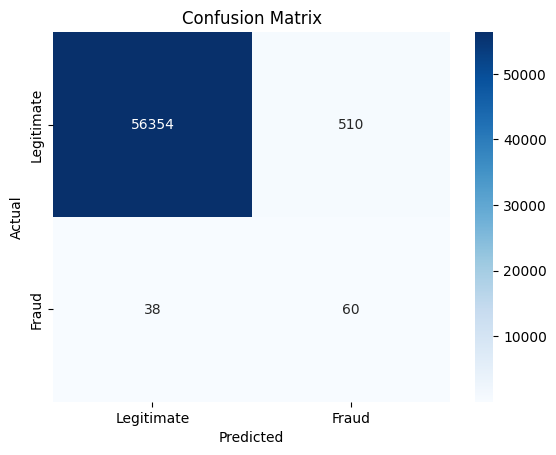

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()